In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder ,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest ,f_regression
import joblib as saver
from scipy.stats import randint
from sklearn.metrics import mean_absolute_error , mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [2]:
datapath = "teen_phone_addiction_dataset.csv"
data = pd.read_csv(datapath)         
columns = data.columns
shape = data.shape
ns = data.isnull()
print("data's shape : " , shape)
print("data's columns : " , list(columns))

data's shape :  (3000, 25)
data's columns :  ['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level']


In [3]:
def null_values(data , features, show=False):
    nnulls = 0
    nulls = []
    for col in features:
        nls = data[col].isnull().sum()
        if nls > 0:
            nulls += 1
            nulls.append(col)
    if show:
        if nnulls == 0:
            print("no null values in the data")
        else :
            print("number of null values : " , nnulls)          
            print("columns : " , nulls)
null_values(data , data.columns , show=True)

no null values in the data


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

_**let's drop those useless features untill now**_

In [5]:
feats_todrop = ['Name', 'ID', 'Location']
data.drop(columns=feats_todrop , inplace=True)

_**I usualy like to start handling the objects first**_

In [6]:
def get_objects(data , features, show=False):
    objects = []
    for col in features:
        dtype = data[col].dtype
        if dtype == 'object':
           objects.append(col)
    if show:
        print(f"you got {len(objects)} object columns")
        print(objects)
    return objects
features = data.columns
objects = get_objects(data , features , show=True)

you got 3 object columns
['Gender', 'School_Grade', 'Phone_Usage_Purpose']


In [7]:
data['School_Grade']
def remove_th(value):
    value = str(value).lower()
    value = value.replace('th' , '').strip()
    return float(value)
data['School_Grade'] = data['School_Grade'].apply(remove_th)

In [8]:
def encode(data , feature , save=False):
    encoded = {}
    if feature in data.columns:
       encoder = LabelEncoder()
       data[feature] = encoder.fit_transform(data[feature]) 
       encoded[feature] = encoder
       print(f"{feature} has done encoded")
    else :
        print(f"data has no feature called : {feature} !")
    if save:
        saver.dump(encoded , "encoded.joblib")
        print("encoder saved successfuly as 'encoded.joblib'✅")
    return data
data = encode(data , 'Gender' , save=True)    

Gender has done encoded
encoder saved successfuly as 'encoded.joblib'✅


In [9]:
objc = get_objects(data , data.columns , show=False)
data = pd.get_dummies(data, columns=['Phone_Usage_Purpose'] , dtype=int)
print(f"{'Phone_Usage_Purpose'} column has done hotencoded ")
objc = get_objects(data , data.columns , show=True)

Phone_Usage_Purpose column has done hotencoded 
you got 0 object columns
[]


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               3000 non-null   int64  
 1   Gender                            3000 non-null   int64  
 2   School_Grade                      3000 non-null   float64
 3   Daily_Usage_Hours                 3000 non-null   float64
 4   Sleep_Hours                       3000 non-null   float64
 5   Academic_Performance              3000 non-null   int64  
 6   Social_Interactions               3000 non-null   int64  
 7   Exercise_Hours                    3000 non-null   float64
 8   Anxiety_Level                     3000 non-null   int64  
 9   Depression_Level                  3000 non-null   int64  
 10  Self_Esteem                       3000 non-null   int64  
 11  Parental_Control                  3000 non-null   int64  
 12  Screen

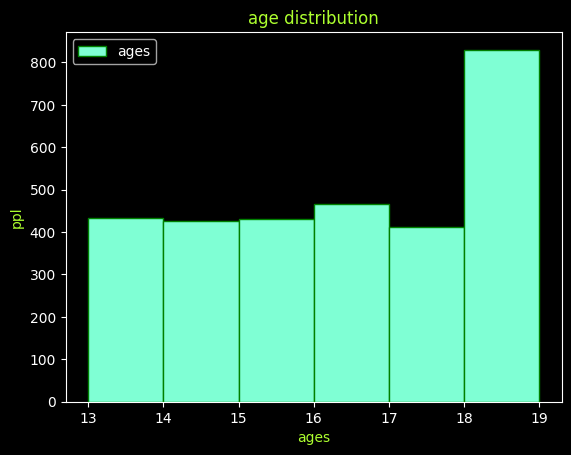

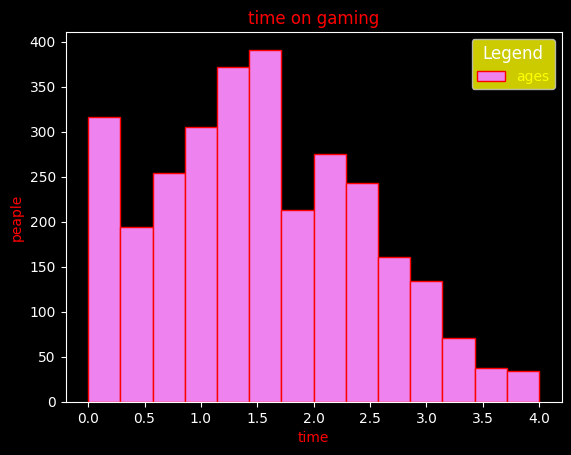

In [20]:
plt.style.use("dark_background")
plt.hist(data['Age'] , bins=6 , edgecolor = 'green', color='aquamarine' , label = 'ages')
plt.title("age distribution", color='greenyellow')
plt.xlabel("ages", color='greenyellow')
plt.ylabel("ppl", color='greenyellow')
plt.legend()
plt.grid(False)
plt.show()

# plt.style.use("fivethirtyeight")
plt.style.use("dark_background")
plt.hist(data['Time_on_Gaming'] , bins=14 , edgecolor = 'red', color='violet' , label = 'ages')
plt.title("time on gaming", color='red')
plt.xlabel("time", color='red')
plt.ylabel("peaple", color='red')
plt.legend(title="Legend", labelcolor='yellow', title_fontsize=12, facecolor='yellow')
plt.grid(False)
plt.show()

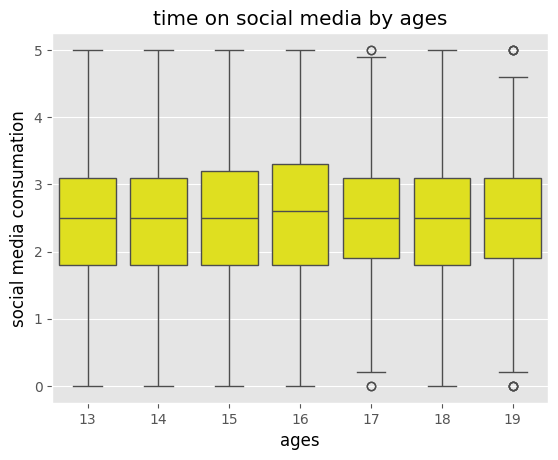

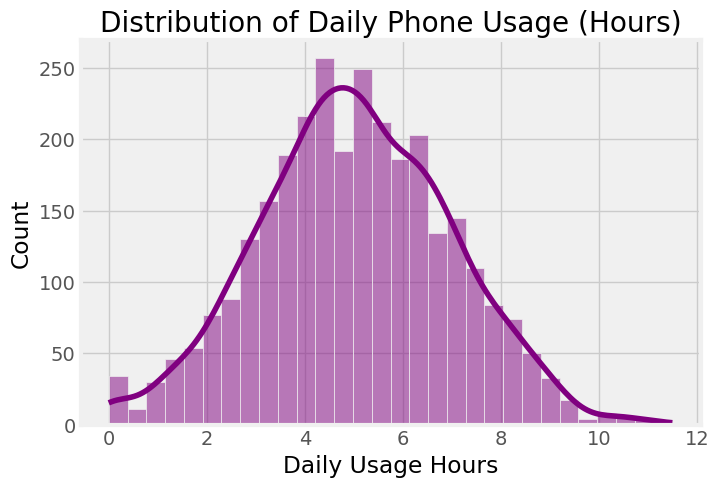

In [21]:
plt.style.use("ggplot")
sns.boxplot(x ='Age' , y='Time_on_Social_Media' , data=data , color='yellow')
plt.title("time on social media by ages", color='black')
plt.xlabel("ages", color='black')
plt.ylabel("social media consumation", color='black')
plt.show()

plt.figure(figsize=(8, 5))
plt.style.use('fivethirtyeight')
sns.histplot(data['Daily_Usage_Hours'], kde=True, bins=30, color='purple')
plt.title("Distribution of Daily Phone Usage (Hours)", color='black')
plt.xlabel("Daily Usage Hours", color='black')
plt.ylabel("Count", color='black')
plt.grid(True)
plt.show()

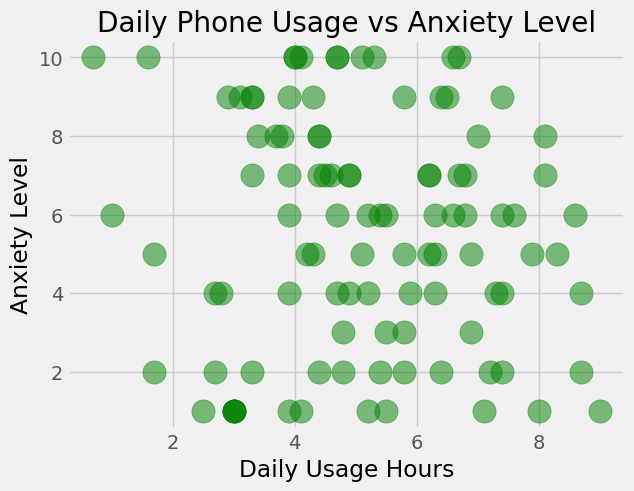

In [22]:
plt.scatter(data['Daily_Usage_Hours'][:100], data['Anxiety_Level'][:100], c='green' , s=280 , alpha=0.5)
plt.title("Daily Phone Usage vs Anxiety Level" , color='black')
plt.xlabel("Daily Usage Hours", color='black')
plt.ylabel("Anxiety Level", color='black')
plt.grid(True)
plt.show()

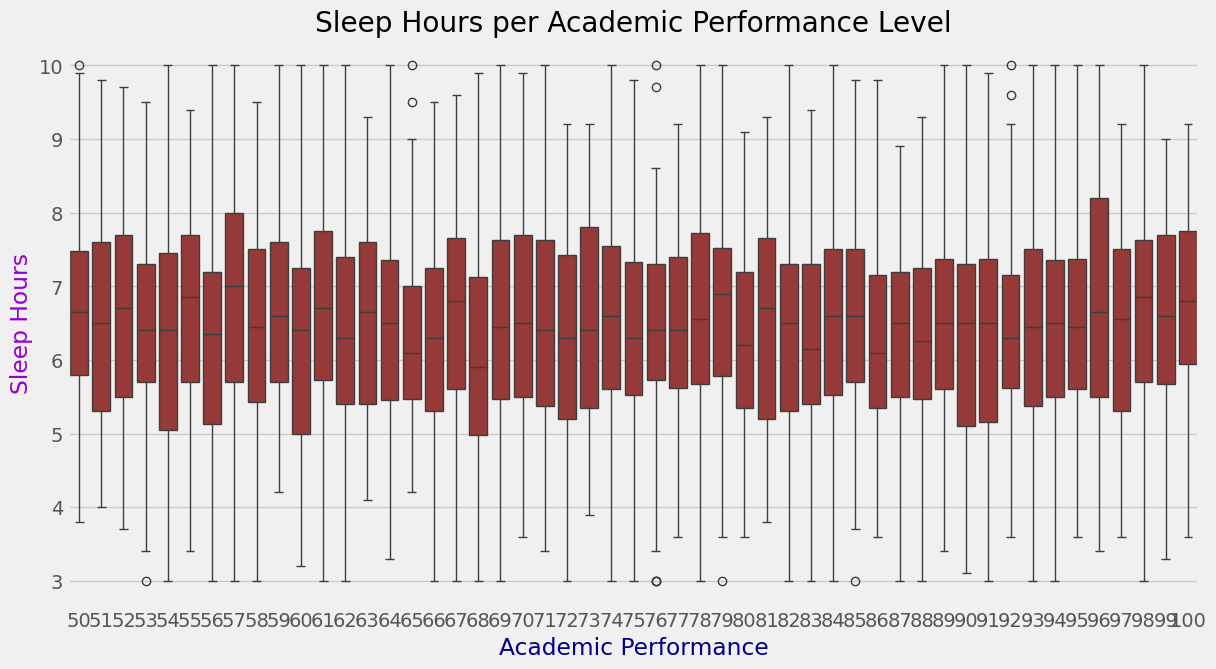

In [23]:
plt.figure(figsize=(13, 7))
plt.style.use("fivethirtyeight")
sns.boxplot(x='Academic_Performance', y='Sleep_Hours', data=data, color='brown')
plt.title("Sleep Hours per Academic Performance Level" , color='black')
plt.xlabel("Academic Performance" , color='darkblue')
plt.ylabel("Sleep Hours" , color='darkviolet')
plt.show()


_**Now handling numbers**_

In [10]:
data.head()

,Age,Gender,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,...,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level,Phone_Usage_Purpose_Browsing,Phone_Usage_Purpose_Education,Phone_Usage_Purpose_Gaming,Phone_Usage_Purpose_Other,Phone_Usage_Purpose_Social Media
0,13,0,9.0,4.0,6.1,78,5,0.1,10,3,...,1.7,1.2,4,8.7,10.0,1,0,0,0,0
1,17,0,7.0,5.5,6.5,70,5,0.0,3,7,...,4.0,1.8,2,5.3,10.0,1,0,0,0,0
2,13,2,11.0,5.8,5.5,93,8,0.8,2,3,...,1.5,0.4,6,5.7,9.2,0,1,0,0,0
3,18,0,12.0,3.1,3.9,78,8,1.6,9,10,...,1.6,0.8,8,3.0,9.8,0,0,0,0,1
4,14,2,9.0,2.5,6.7,56,4,1.1,1,5,...,0.9,1.1,10,3.7,8.6,0,0,1,0,0


In [11]:
numeric_cols = data.select_dtypes(include='number').columns
cols_to_check = [col for col in numeric_cols if data[col].nunique() > 2]

Q1 = data[cols_to_check].quantile(0.25)
Q3 = data[cols_to_check].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((data[cols_to_check] < lower_bound) | (data[cols_to_check] > upper_bound)).any(axis=1)
data = data[~outliers]
print(f"✅ Remaining rows after cleaning: {len(data)}")


✅ Remaining rows after cleaning: 2857


In [12]:
def minmax(data , features):
    for col in features:
        mx = data[col].max()
        mn = data[col].min()
        print(f"{col} : max = {mx} | min = {mn}")
minmax(data , data.columns)       
feats_toscale = ['Age','School_Grade','Daily_Usage_Hours',''] 

Age : max = 19 | min = 13
Gender : max = 2 | min = 0
School_Grade : max = 12.0 | min = 7.0
Daily_Usage_Hours : max = 10.3 | min = 0.0
Sleep_Hours : max = 10.0 | min = 3.0
Academic_Performance : max = 100 | min = 50
Social_Interactions : max = 10 | min = 0
Exercise_Hours : max = 3.0 | min = 0.0
Anxiety_Level : max = 10 | min = 1
Depression_Level : max = 10 | min = 1
Self_Esteem : max = 10 | min = 1
Parental_Control : max = 1 | min = 0
Screen_Time_Before_Bed : max = 2.4 | min = 0.0
Phone_Checks_Per_Day : max = 150 | min = 20
Apps_Used_Daily : max = 20 | min = 5
Time_on_Social_Media : max = 5.0 | min = 0.0
Time_on_Gaming : max = 4.0 | min = 0.0
Time_on_Education : max = 3.0 | min = 0.0
Family_Communication : max = 10 | min = 1
Weekend_Usage_Hours : max = 11.4 | min = 0.7
Addiction_Level : max = 10.0 | min = 5.0
Phone_Usage_Purpose_Browsing : max = 1 | min = 0
Phone_Usage_Purpose_Education : max = 1 | min = 0
Phone_Usage_Purpose_Gaming : max = 1 | min = 0
Phone_Usage_Purpose_Other : max = 

In [13]:
cols_to_scale = [
    'Age', 'School_Grade', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
    'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level',
    'Self_Esteem', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
    'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Family_Communication',
    'Weekend_Usage_Hours', 'Addiction_Level'
]

scaler = MinMaxScaler()


def scale(data , columns , save=True ):
    scalers = {}
    for col in columns:
        scaler = MinMaxScaler()
        data[col] = scaler.fit_transform(data[[col]])
        scalers[col] = scaler
    print("columns scaled successfuly ✅")
    print("number of columns saved : " , list(columns))
    if save:
        saver.dump(scalers , 'scalers.joblib')       
        print("scalerd columns has saved at 'scalers.joblib'")
    return data
data = scale(data , cols_to_scale , save=True)    

columns scaled successfuly ✅
number of columns saved :  ['Age', 'School_Grade', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level']
scalerd columns has saved at 'scalers.joblib'


In [20]:
X = data.drop(columns='Addiction_Level')
y = data['Addiction_Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=98)
k = 15
selector = SelectKBest(score_func=f_regression, k=k)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)
selected_cols = X.columns[selector.get_support()]
print("Selected features:", list(selected_cols))
print("X_train shape:", X_train.shape)
print("X_test  shape:", X_test.shape)

Selected features: ['Age', 'Gender', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Self_Esteem', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Phone_Usage_Purpose_Gaming', 'Phone_Usage_Purpose_Other', 'Phone_Usage_Purpose_Social Media']
X_train shape: (2285, 15)
X_test  shape: (572, 15)


_**Now handling numbers**_

In [50]:
model1 = XGBRegressor()
params = {
    "eta" : [0.01 , 0.1 , 0.1],                   
    "max_depth" : randint(2, 14),
    "min_child_weight": randint(5, 20),
    "subsample" : [0.6 , 0.8 , 0.9],       
    "colsample_bytree" : [0.6 , 0.8 , 0.9],
    "lambda" : [0.1 , 2 , 10],           
}
xgbsearch = RandomizedSearchCV(model1 , param_distributions=params , cv=5 , random_state=10 , n_iter=50)
xgbsearch.fit(X_train , y_train)

best_estim = xgbsearch.best_estimator_
best_params = xgbsearch.best_params_
best_score = xgbsearch.best_score_

print("best estimator : \n" , best_estim)
print("best params : \n" , best_params)
print(f"best score : {best_score*100:.2f}%")

model = best_estim
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test , predictions)
mse = mean_squared_error(y_test , predictions)


print(f"mae : {mae:.3f}")
print(f"mse : {mse:.3f}")

best estimator : 
 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, feature_weights=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=2, learning_rate=None,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=13, max_leaves=None,
             min_child_weight=13, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, ...)
best params : 
 {'colsample_bytree': 0.8, 'eta': 0.1, 'lambda': 2, 'max_depth': 13, 'min_child_weight': 13, 'subsample': 0.6}
best score : 91.03%
mae : 0.054
mse : 0.006


In [ ]:
importance = model.feature_importances_

plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(importance)  
plt.style.use('dark_background')
plt.barh(range(len(importance)), importance[sorted_idx] , align='edge', color='yellow' , alpha=0.8)
plt.yticks(range(len(importance)), np.array(selected_cols)[sorted_idx] , color='cyan')
plt.xlabel("Feature Importance" , color='blue')
plt.title("Top Feature Importances", color='blue')
plt.grid(False)
plt.show()

In [ ]:
model2 = LGBMRegressor()
params2 = {
    "learning_rate" : [0.01 , 0.1 , 0.1],                   
    "n_estimators" : randint(100, 300),
    "min_child_samples": randint(5, 20),
    "subsample" : [0.6 , 0.8 , 0.9],       
    "colsample_bytree" : [0.6 , 0.8 , 0.9],
    "reg_lambda" : [0.1 , 2 , 10],           
}
lightsearch = RandomizedSearchCV(model2 , param_distributions=params2 , cv=5 , random_state=10 , n_iter=50)
lightsearch.fit(X_train , y_train)

best_estim2 = lightsearch.best_estimator_
best_params2 = lightsearch.best_params_
best_score2 = lightsearch.best_score_

print("best estimator : \n" , best_estim2)
print("best params : \n" , best_params2)
print(f"best score : {best_score2*100:.2f}%")

lightmodel = best_estim2
predictions2 = lightmodel.predict(X_test)
mae2 = mean_absolute_error(y_test , predictions2)
mse2 = mean_squared_error(y_test , predictions2)

print(f"mae : {mae2:.3f}")
print(f"mse : {mse2:.3f}")

In [34]:
print(f"best score : {best_score2*100:.2f}%")
print(f"mae : {mae2:.3f}")
print(f"mse : {mse2:.3f}")

best score : 91.81%
mae : 0.049
mse : 0.005


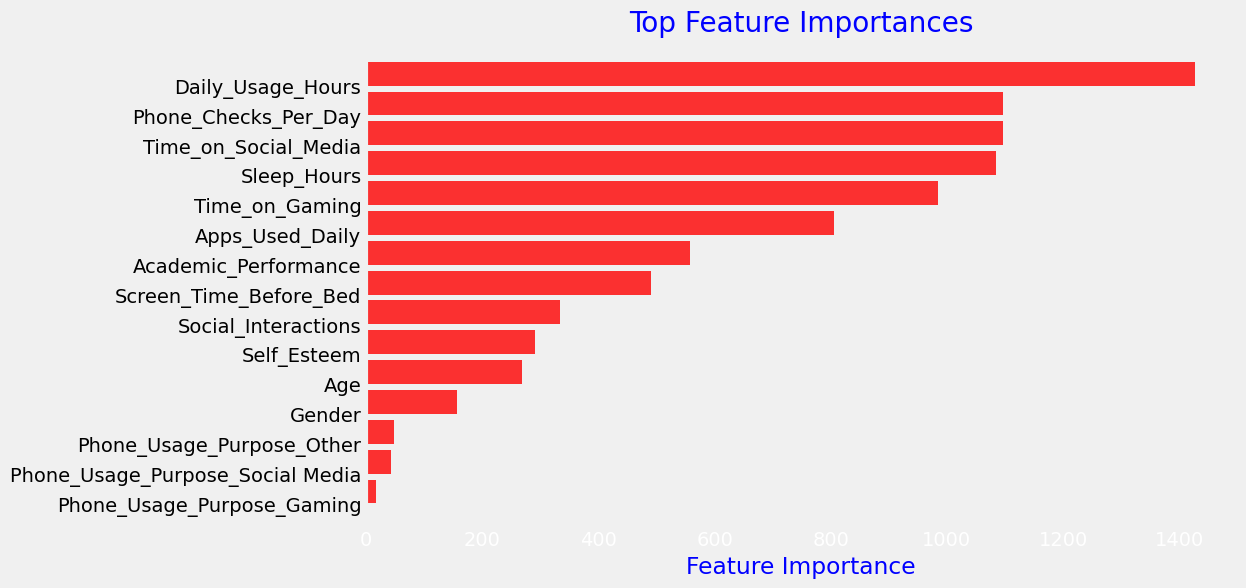

In [46]:
importance2 = lightmodel.feature_importances_

plt.figure(figsize=(10, 6))
sorted_idx2 = np.argsort(importance2)  
plt.barh(range(len(importance2)), importance2[sorted_idx2] , align='edge', color='red' , alpha=0.8)
plt.yticks(range(len(importance2)), np.array(selected_cols)[sorted_idx2] , color='black')
plt.xlabel("Feature Importance" , color='blue')
plt.title("Top Feature Importances", color='blue')
plt.grid(False)
plt.show()

_**COMPARAISON**_

In [54]:
print("LIGHTgbm : ")
print(f"best score : {best_score2*100:.2f}%")
print(f"mae : {mae2:.3f}")
print(f"mse : {mse2:.3f}")
print("-"*20)
print("XGBoost : ")
print(f"best score : {best_score*100:.2f}%")
print(f"mae : {mae:.3f}")
print(f"mse : {mse:.3f}")

LIGHTgbm : 
best score : 91.81%
mae : 0.049
mse : 0.005
--------------------
XGBoost : 
best score : 91.03%
mae : 0.054
mse : 0.006


In [57]:
saver.dump(lightmodel , 'lightmodel.joblib')
print("model saved successfuly ✅")

model saved successfuly ✅
